# Імпорт бібліотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Дослідницький аналіз даних

Підключення до набору даних та загальна інформація

In [2]:
df = pd.read_excel(r'C:\Work folders\ML_Projects\Прогнозування продуктивності комбайнів\Погодинний_збір_пшениці.xlsx')

Перші 5 рядків набору даних

In [3]:
df.head()

,Культура,date_time,Гаражний номер,Модель,Зібрано_га,Опади_мм,Сума_опадів_за_позавчора_мм,Сума_опадів_за_вчора_мм,Сума_опадів_за_ніч_мм,Сума_опадів_за_попередні_48_год_мм,Сума_опадів_за_попередні_24_год_мм,Сума_опадів_за_попередні_12_год_мм,Сума_опадів_за_попередні_9_год_мм,Сума_опадів_за_попередні_6_год_мм,Сума_опадів_за_попередні_3_год_мм
0,Пшениця,2022-07-21 08:00:00,К-117,CLAAS LEXION 770,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Пшениця,2022-07-21 09:00:00,К-117,CLAAS LEXION 770,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Пшениця,2022-07-21 22:00:00,К-117,CLAAS LEXION 770,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Пшениця,2022-07-21 23:00:00,К-117,CLAAS LEXION 770,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Пшениця,2022-07-22 08:00:00,К-117,CLAAS LEXION 770,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Загальна інформація про DataFrame

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93199 entries, 0 to 93198
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Культура                            93199 non-null  object        
 1   date_time                           93199 non-null  datetime64[ns]
 2   Гаражний номер                      93199 non-null  object        
 3   Модель                              93199 non-null  object        
 4   Зібрано_га                          93199 non-null  float64       
 5   Опади_мм                            93199 non-null  float64       
 6   Сума_опадів_за_позавчора_мм         92983 non-null  float64       
 7   Сума_опадів_за_вчора_мм             93191 non-null  float64       
 8   Сума_опадів_за_ніч_мм               93191 non-null  float64       
 9   Сума_опадів_за_попередні_48_год_мм  93195 non-null  float64       
 10  Сума_опадів_за_поперед

Перевірка на пропущені значення

In [5]:
df.isnull().sum()

Культура                                0
date_time                               0
Гаражний номер                          0
Модель                                  0
Зібрано_га                              0
Опади_мм                                0
Сума_опадів_за_позавчора_мм           216
Сума_опадів_за_вчора_мм                 8
Сума_опадів_за_ніч_мм                   8
Сума_опадів_за_попередні_48_год_мм      4
Сума_опадів_за_попередні_24_год_мм      4
Сума_опадів_за_попередні_12_год_мм      4
Сума_опадів_за_попередні_9_год_мм       4
Сума_опадів_за_попередні_6_год_мм       4
Сума_опадів_за_попередні_3_год_мм       4
dtype: int64

In [6]:
(df.isnull().mean()*100).round(2)

Культура                              0.00
date_time                             0.00
Гаражний номер                        0.00
Модель                                0.00
Зібрано_га                            0.00
Опади_мм                              0.00
Сума_опадів_за_позавчора_мм           0.23
Сума_опадів_за_вчора_мм               0.01
Сума_опадів_за_ніч_мм                 0.01
Сума_опадів_за_попередні_48_год_мм    0.00
Сума_опадів_за_попередні_24_год_мм    0.00
Сума_опадів_за_попередні_12_год_мм    0.00
Сума_опадів_за_попередні_9_год_мм     0.00
Сума_опадів_за_попередні_6_год_мм     0.00
Сума_опадів_за_попередні_3_год_мм     0.00
dtype: float64

Так як пусті значення лише в колонках з опадами і їх дуже мало, то можемо замінити їх нулями, вважаючи, що якщо значення відсутні, то і опадів не було.

Описова статистика для числових змінних

In [7]:
df.describe()

,date_time,Зібрано_га,Опади_мм,Сума_опадів_за_позавчора_мм,Сума_опадів_за_вчора_мм,Сума_опадів_за_ніч_мм,Сума_опадів_за_попередні_48_год_мм,Сума_опадів_за_попередні_24_год_мм,Сума_опадів_за_попередні_12_год_мм,Сума_опадів_за_попередні_9_год_мм,Сума_опадів_за_попередні_6_год_мм,Сума_опадів_за_попередні_3_год_мм
count,93199,93199.000000,93199.000000,92983.000000,93191.000000,93191.000000,93195.000000,93195.000000,93195.000000,93195.000000,93195.000000,93195.000000
mean,2023-12-24 09:42:06.864022016,1.191899,0.109247,2.392505,1.927556,0.636556,3.968493,1.919269,1.105731,0.892194,0.624526,0.624526
min,2022-07-06 08:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2022-08-21 23:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2023-08-15 16:00:00,0.452642,0.000000,0.300000,0.200000,0.000000,1.100000,0.200000,0.000000,0.000000,0.000000,0.000000
75%,2024-08-08 17:00:00,2.328098,0.000000,2.200000,1.700000,0.100000,5.200000,1.400000,0.500000,0.400000,0.200000,0.200000
max,2025-08-27 23:00:00,11.996675,15.700000,35.500000,35.500000,25.200000,50.100000,40.800000,30.500000,27.000000,26.500000,26.500000
std,NaN,1.374960,0.562805,4.673122,4.087079,2.042664,6.270378,4.233430,2.880700,2.431007,1.890815,1.890815


Розподіл цільової змінної "Зібрано_га"

Text(0, 0.5, 'Частота значень')

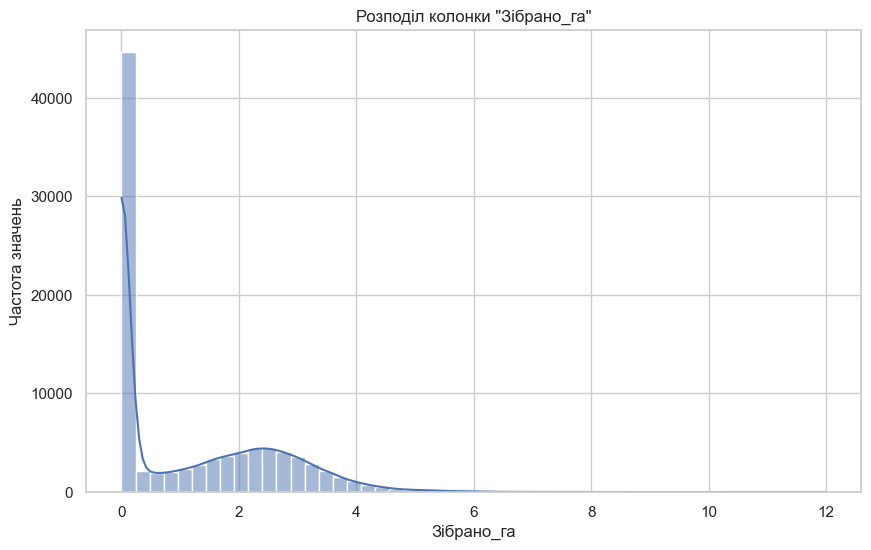

In [8]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df['Зібрано_га'], bins=50, kde=True)
plt.title('Розподіл колонки "Зібрано_га"')
plt.xlabel('Зібрано_га')
plt.ylabel('Частота значень')

Велика кількість записів, коли продуктивність нуль. Можливо це простої через погодні умови чи інші причини, переїзди або технічні зупинки.

Також видно довгий хвіст вправо, дані не мають нормального розподілу, є рідкісні випадки дуже високої продуктивності (до 12 га на годину)

Аналіз категорійних змінних

In [9]:
category_columns = df.select_dtypes(include=['object']).columns.tolist()

category_columns

['Культура', 'Гаражний номер', 'Модель']

In [10]:
for col in category_columns:
    print(f'Унікальні значення в колонці "{col}": {df[col].nunique()}')

Унікальні значення в колонці "Культура": 1
Унікальні значення в колонці "Гаражний номер": 104
Унікальні значення в колонці "Модель": 8


In [11]:
print(df['Гаражний номер'].value_counts())

Гаражний номер
К-124    1745
К-123    1608
К-117    1604
К-119    1592
К-024    1471
К-046    1328
К-137    1252
К-155    1252
К-135    1224
К-131    1224
К-114    1209
К-145    1205
К-016    1174
К-146    1166
К-168    1163
К-166    1163
К-141    1151
К-113    1144
К-115    1142
К-136    1141
К-142    1136
К-147    1119
К-148    1118
К-134    1114
К-112    1113
К-144    1111
К-149    1106
К-151    1099
К-150    1095
К-162    1093
К-143    1085
К-152    1084
К-167    1067
К-127    1044
К-161    1033
К-125    1031
К-164    1029
К-082    1020
К-121    1016
К-118    1016
К-116    1016
К-158    1011
К-159    1011
К-122    1001
К-126     994
К-165     993
К-083     993
К-132     989
К-022     984
К-163     981
К-160     967
К-154     957
К-051     942
К-052     934
К-120     928
К-109     923
К-029     883
К-078     870
К-017     869
К-133     864
К-140     856
К-044     850
К-015     848
К-020     846
К-081     845
К-077     842
К-080     830
К-072     825
К-018     822
К-139     817
К-079

In [12]:
print(df['Модель'].value_counts())

Модель
CLAAS LEXION 770        32961
CLAAS LEXION 670        22558
CLAAS LEXION 560        19896
NEW HOLLAND CR 8.90     11511
NEW HOLLAND CR 9.90      3483
CLAAS LEXION 8800 TT     1451
CLAAS LEXION 580          923
CR 8.90                   416
Name: count, dtype: int64


Бачимо, що у нашому датасеті:
    1) лише одна культура, тому можемо не використовувати цю ознаку в моделі. 
    2) колонка гаражний номер з номерами техніки містить велику кількість категорій, що створить дуже багато ознак, то не будемо її поки використовувати, а залишимо лише "Модель".
    3) в колонці "Модель" є категорії "CR 8.90" та "NEW HOLLAND CR 8.90", швидше за все це одна і та ж модель техніки, тому потрібно буде привести до спільної назви

Аналіз числових змінних

In [13]:
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

numeric_columns

['Зібрано_га',
 'Опади_мм',
 'Сума_опадів_за_позавчора_мм',
 'Сума_опадів_за_вчора_мм',
 'Сума_опадів_за_ніч_мм',
 'Сума_опадів_за_попередні_48_год_мм',
 'Сума_опадів_за_попередні_24_год_мм',
 'Сума_опадів_за_попередні_12_год_мм',
 'Сума_опадів_за_попередні_9_год_мм',
 'Сума_опадів_за_попередні_6_год_мм',
 'Сума_опадів_за_попередні_3_год_мм']

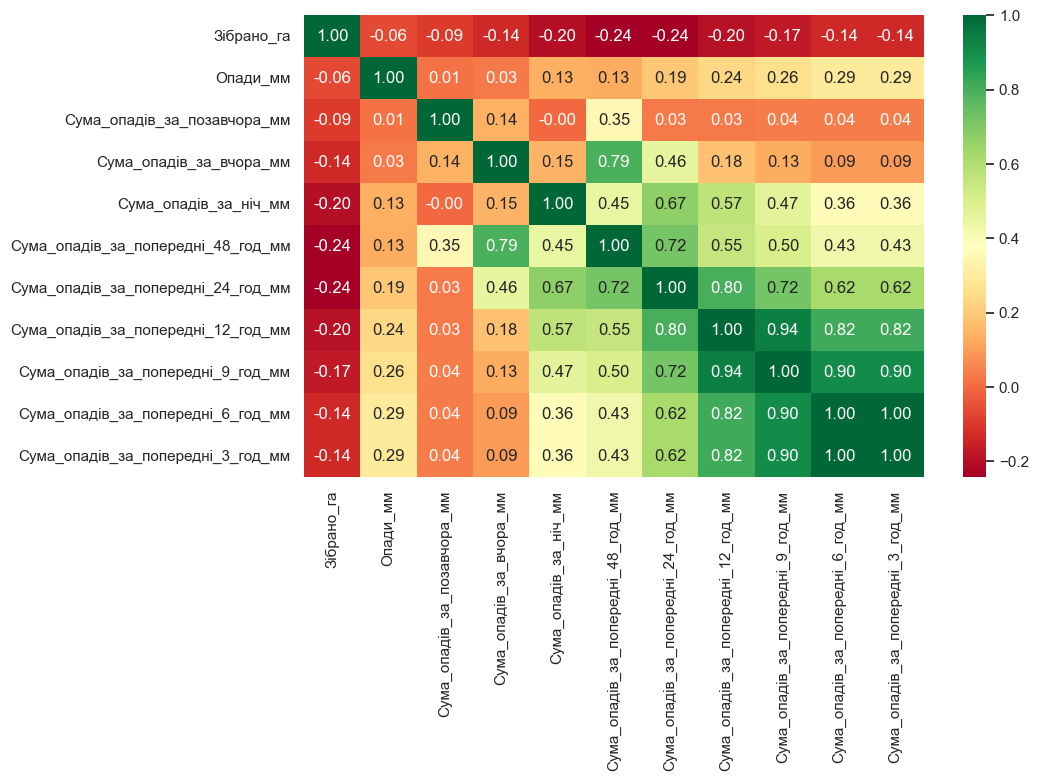

In [14]:
plt.figure(figsize = (10, 6))
sns.heatmap(data = df[numeric_columns].corr(), annot = True, cmap = "RdYlGn", cbar = True, fmt='.2f')
plt.show()

Всі ознаки мають негативну кореляцію з цільовою змінною. Бачимо, що ознаки з лагами 3, 6, 12, 24 і 48 годин сильно корелюють між собою, що логічно, так як це накопичені суми опадів і вони інформаційно дублюються. Спробуємо поки що залишити лише ознаки з періодами, що не перетинаються в часі та одну ознаку з лагом 3 години щоб уникнути шуму та мультиколінеарності


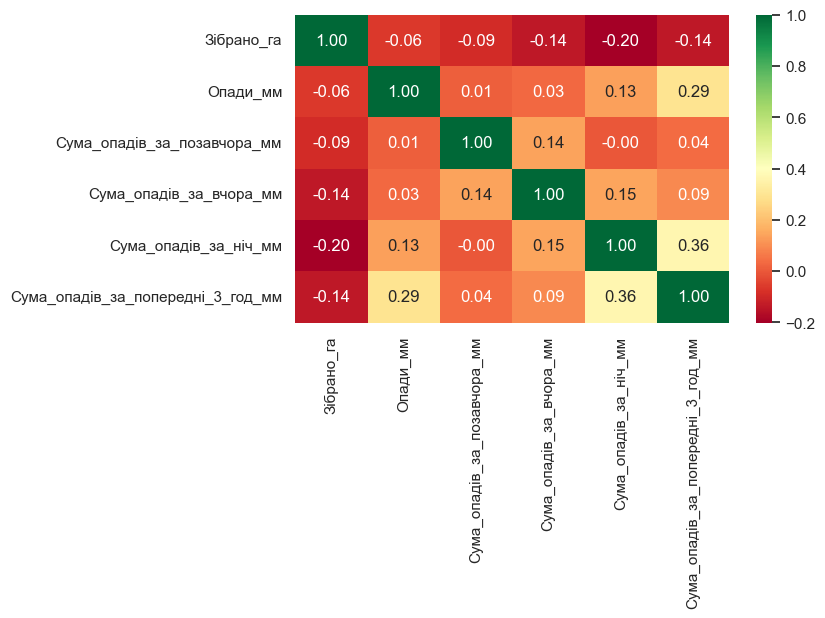

In [15]:
col_list = [
    'Зібрано_га', 
    'Опади_мм', 
    'Сума_опадів_за_позавчора_мм',
    'Сума_опадів_за_вчора_мм',
    'Сума_опадів_за_ніч_мм',
    'Сума_опадів_за_попередні_3_год_мм'
    ]

plt.figure(figsize = (7, 4))
sns.heatmap(data = df[col_list].corr(), annot = True, cmap = "RdYlGn", cbar = True, fmt='.2f')
plt.show()

Найбільший вплив має сума опадів за ніч, що логічно, бо коли вночі йшов дощ, комбайн не виїде в поле з самого ранку, або працюватиме повільніше. Сума опадів за вчорашній і позавчорашній день, мають вже менший вплив так як поле висихає. Дощ за останні 3 години діє "тут і зараз", блокуючи роботу. Опади в момент збору: кореляція може бути низькою через те, що навіть якщо дощ закінчився, то робота не відновлюється миттєво (потрібен час на висихання). Тобто факт "зараз сухо" не гарантує "зараз збираємо".

Text(0, 0.5, 'Середній збі, га')

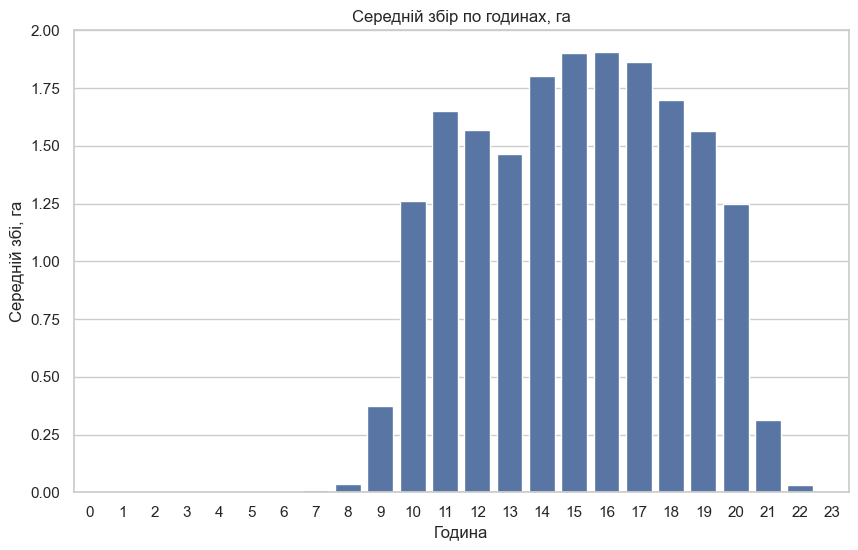

In [16]:
df['hour'] = df['date_time'].dt.hour
hourly_harvest = df.groupby('hour')['Зібрано_га'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=hourly_harvest, x='hour', y='Зібрано_га')
plt.title('Середній збір по годинах, га')
plt.xlabel('Година')
plt.ylabel('Середній збі, га')

Бачимо, що зазвичай техніка починає активно працювати з 10 ранку і до 20 години вечора

# Аналіз викидів

Так як продуктивність кожної моделі комбайнів різна, то побудуємо BoxPlot для кожної з них

Text(0, 0.5, 'Модель')

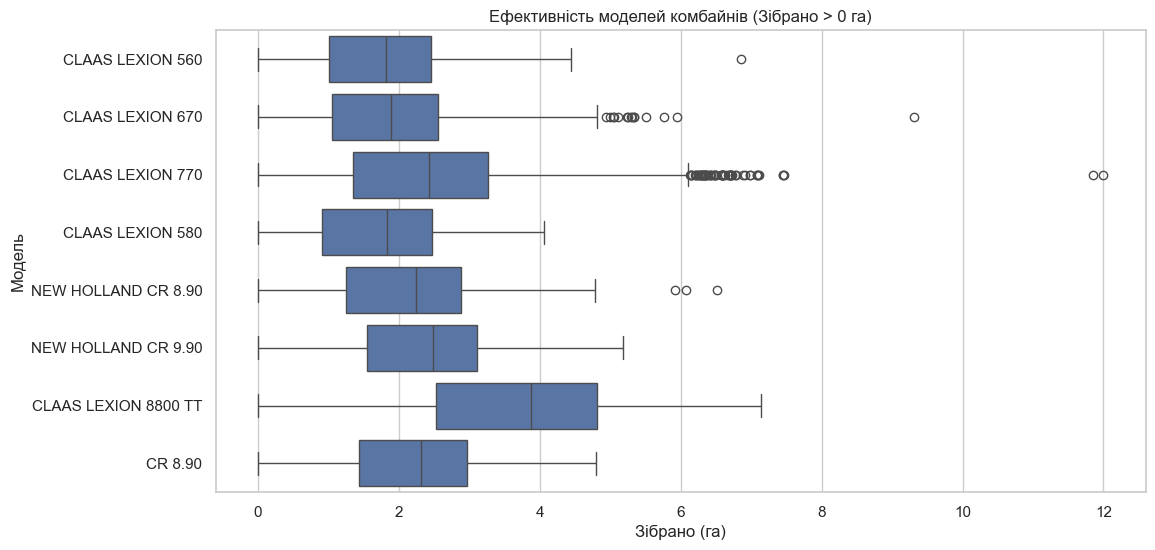

In [17]:
df_active = df[df['Зібрано_га'] > 0]
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_active, x='Зібрано_га', y='Модель')
plt.title('Ефективність моделей комбайнів (Зібрано > 0 га)')
plt.xlabel('Зібрано (га)')
plt.ylabel('Модель')

Бачимо що є аномальні значення по деяких моделях комбайнів, але так як мені зараз невідомо чи це помилки, чи просто рідкісні, але можливі значення продуктивності, то спробую натренувати модель залишивши все як є і замінивши їх.